In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uni=pd.read_csv(r"C:\Users\aksha\Downloads\Universities (1).csv",index_col='Univ')

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
minmax=MinMaxScaler()

In [5]:
uni

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72
Columbia,1310,76,24,12,31510,88
Cornell,1280,83,33,13,21864,90
Dartmouth,1340,89,23,10,32162,95
Duke,1315,90,30,12,31585,95
Georgetown,1255,74,24,12,20126,92
Harvard,1400,91,14,11,39525,97


In [6]:
df=pd.DataFrame(minmax.fit_transform(uni),columns=uni.columns)
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [9]:
agg.fit(df)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [10]:
agg.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int64)

In [11]:
uni['labels']=agg.labels_

In [12]:
grp=uni.groupby('labels')

In [13]:
for x,y in grp:
    print()
    print(x)
    print('_'*50)
    print(y)


0
__________________________________________________
               SAT  Top10  Accept  SFRatio  Expenses  GradRate  labels
Univ                                                                  
Brown         1310     89      22       13     22704        94       0
CMU           1260     62      59        9     25026        72       0
Columbia      1310     76      24       12     31510        88       0
Cornell       1280     83      33       13     21864        90       0
Georgetown    1255     74      24       12     20126        92       0
Northwestern  1260     85      39       11     28052        89       0
NotreDame     1255     81      42       13     15122        94       0
UCBerkeley    1240     95      40       17     15140        78       0
UMichigan     1180     65      68       16     15470        85       0
UPenn         1285     80      36       11     27553        90       0
UVA           1225     77      44       14     13349        92       0

1
____________________

In [14]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [15]:
grp.size()

labels
0    11
1     4
2    10
dtype: int64

In [16]:
from scipy.cluster import hierarchy

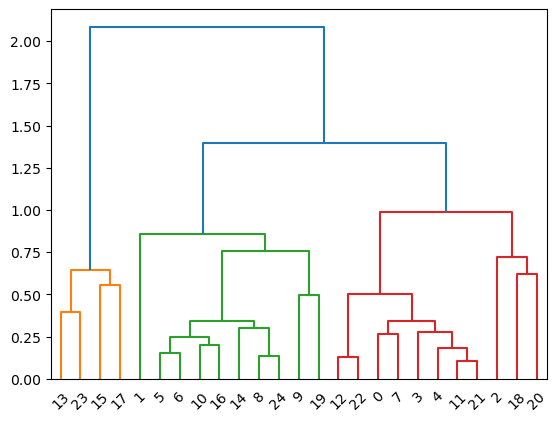

In [17]:
hr=hierarchy.linkage(df,method='complete')
dend=hierarchy.dendrogram(hr,color_threshold=1.1)#here cut at 1.1 so we get 3 clusters